In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import  LinearRegression, Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [56]:
df2=pd.read_csv("../data/data_train.csv")

## **FEATURE ENGINEERING**

In [57]:
df2.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            848 non-null    int64  
 1   Gender                         848 non-null    object 
 2   Weight (kg)                    848 non-null    float64
 3   Height (m)                     848 non-null    float64
 4   Max_BPM                        848 non-null    int64  
 5   Avg_BPM                        848 non-null    int64  
 6   Resting_BPM                    848 non-null    int64  
 7   Session_Duration (hours)       848 non-null    float64
 8   Calories_Burned                848 non-null    float64
 9   Workout_Type                   848 non-null    object 
 10  Fat_Percentage                 848 non-null    float64
 11  Water_Intake (liters)          848 non-null    float64
 12  Workout_Frequency (days/week)  848 non-null    int

Transformamos las variables object en numéricas

In [59]:
df2["Male"] = df2["Gender"].map({"Male": 1, "Female": 0})
df2=df2.drop(columns="Gender")


In [60]:
mapping = {'Yoga': 0, 'Strength': 1, 'Cardio': 2, 'HIIT': 3}
df2['Workout_Type'] = df2['Workout_Type'].map(mapping)


In [61]:
df2.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  848.000000   848.000000  848.000000  848.000000  848.000000   
mean    38.844340    73.739741    1.725189  179.759434  143.755896   
std     12.071386    21.126962    0.128656   11.507244   14.344656   
min     18.000000    40.000000    1.500000  160.000000  120.000000   
25%     29.000000    58.100000    1.620000  170.000000  131.000000   
50%     40.000000    69.850000    1.715000  180.000000  143.000000   
75%     49.000000    85.900000    1.802500  189.000000  156.000000   
max     59.000000   129.900000    2.000000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Workout_Type  \
count   848.000000                848.000000       848.000000    848.000000   
mean     62.188679                  1.257087       906.023585      1.476415   
std       7.321574                  0.338274       271.028122      1.094975   
min      50.000000                  0.500000       303.000000      0.000000   
25%      56.000000                  1.060000       724.750000      1.000000   
50%      62.000000                  1.270000       895.000000      1.000000   
75%      68.000000                  1.450000      1076.500000      2.000000   
max      74.000000                  2.000000      1766.000000      3.000000   

       Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
count      848.000000             848.000000                     848.000000   
mean        25.086439               2.625118                       3.316038   
std          6.245272               0.602018                       0.909936   
min         10.100000               1.500000                       2.000000   
25%         21.300000               2.175000                       3.000000   
50%         26.400000               2.600000                       3.000000   
75%         29.400000               3.100000                       4.000000   
max         35.000000               3.700000                       5.000000   

       Experience_Level         BMI        Male  
count        848.000000  848.000000  848.000000  
mean           1.797170   24.787842    0.528302  
std            0.734633    6.552125    0.499493  
min            1.000000   12.320000    0.000000  
25%            1.000000   19.965000    0.000000  
50%            2.000000   24.110000    1.000000  
75%            2.000000   28.537500    1.000000  
max            3.000000   47.720000    1.000000

Habrá que escalar las variables ya que tenemos una distribución de los datos muy variada entre las variables

## **ANÁLISIS** 

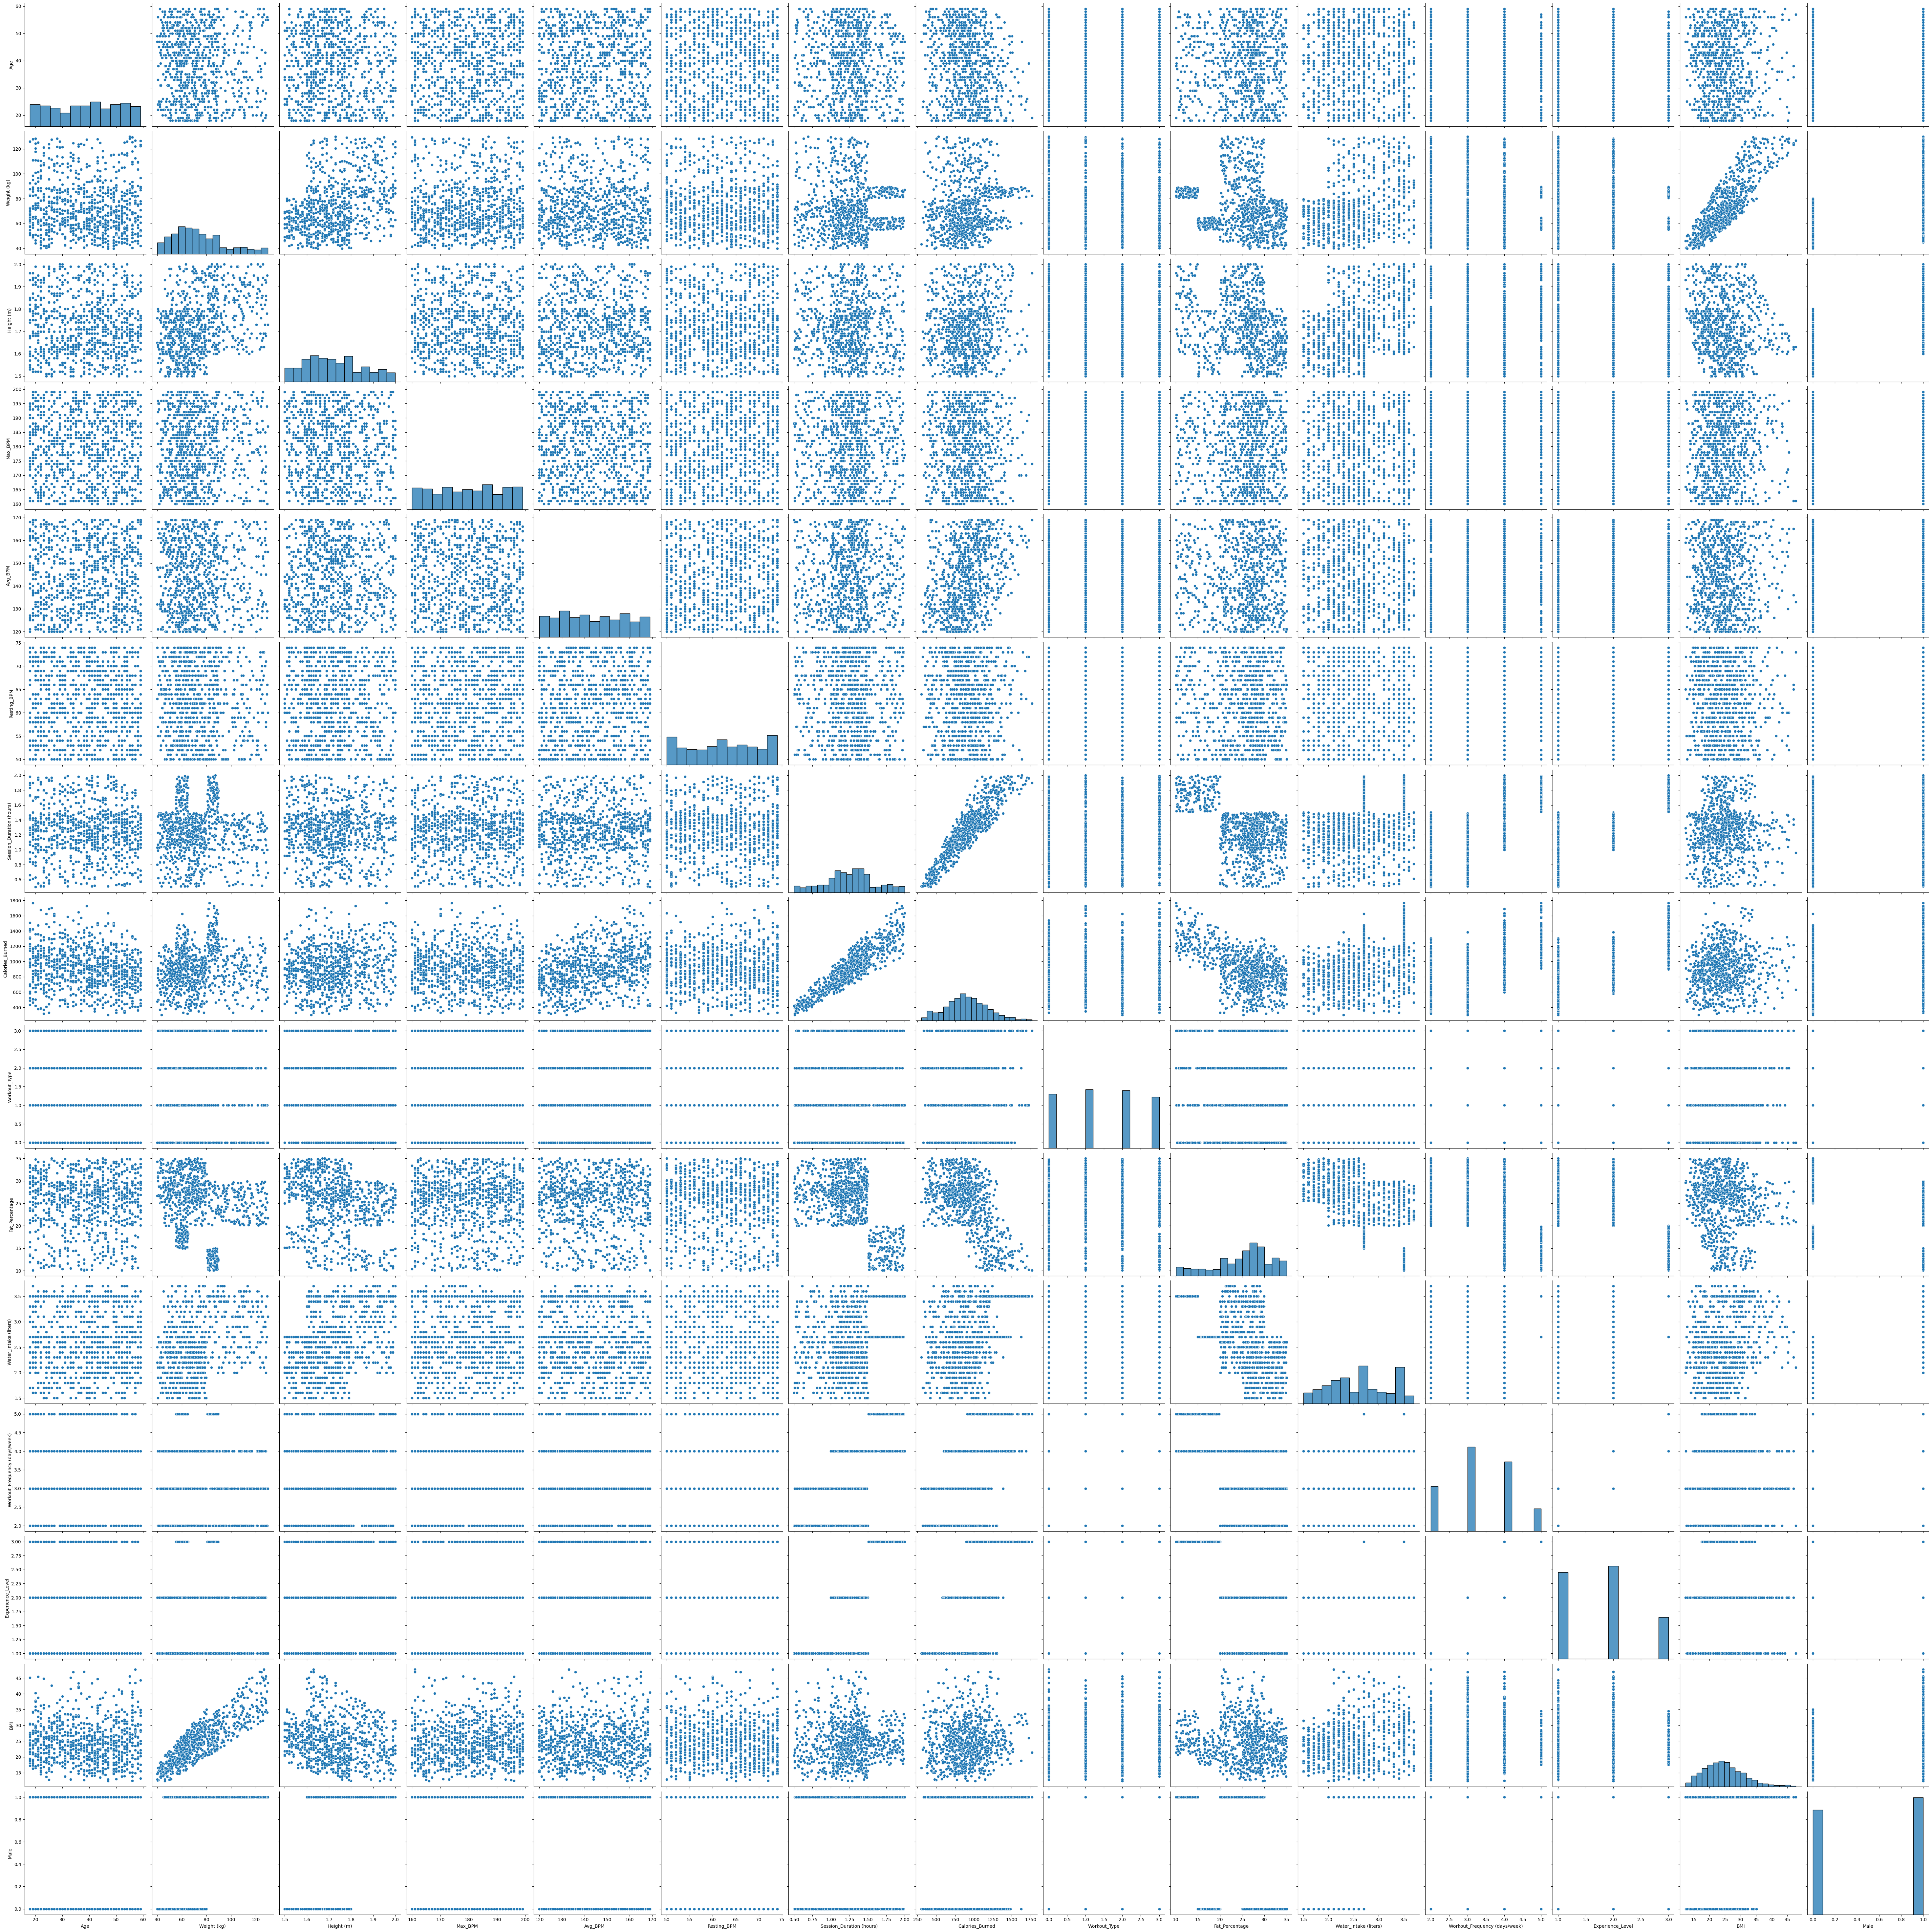

In [62]:
sns.pairplot(df2,height=4,
            vars=df2.columns);

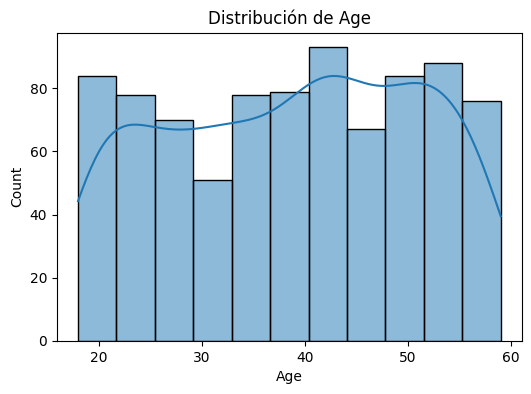

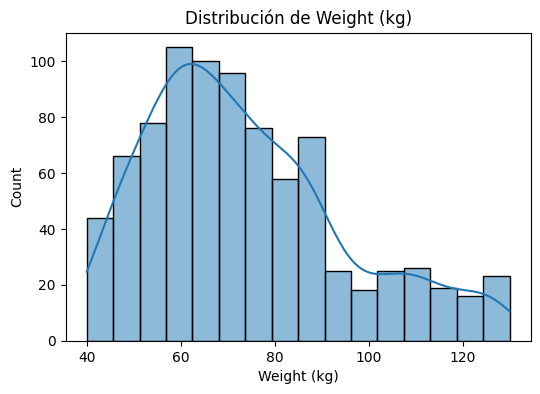

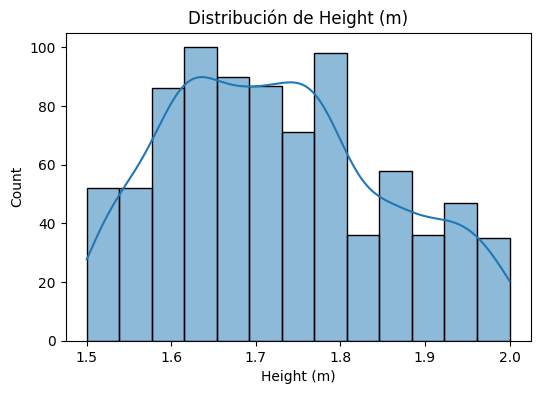

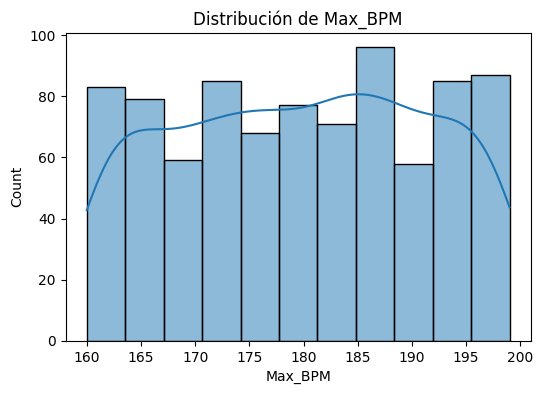

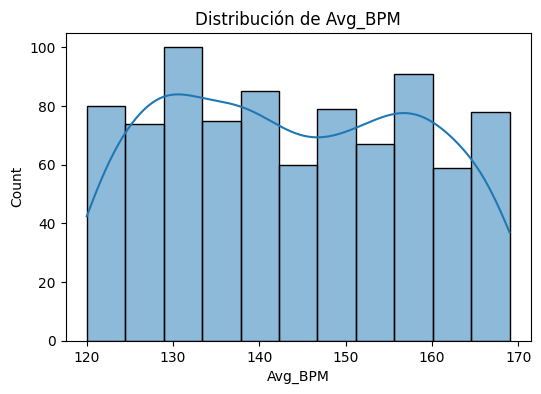

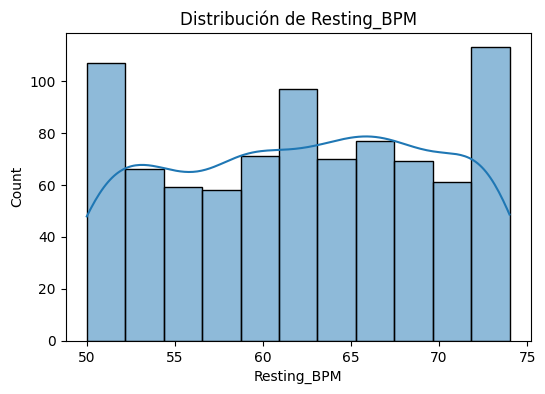

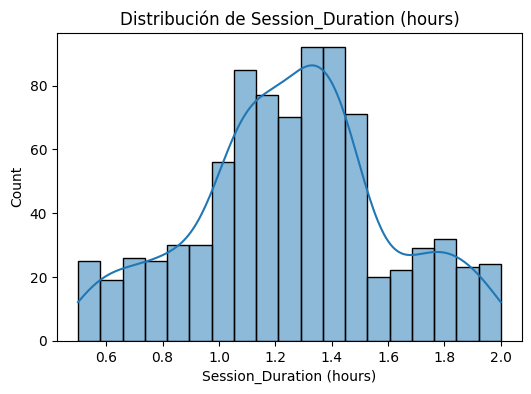

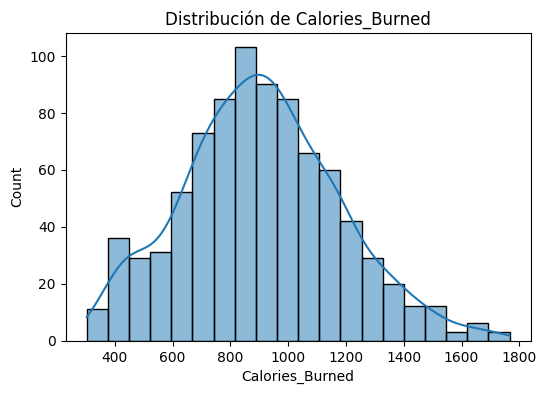

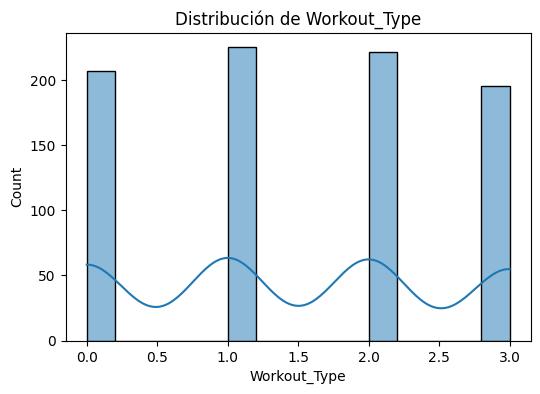

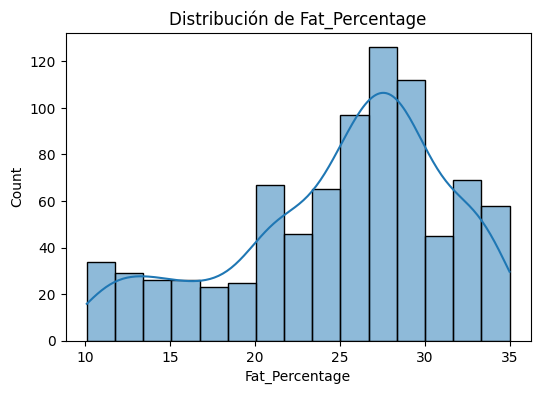

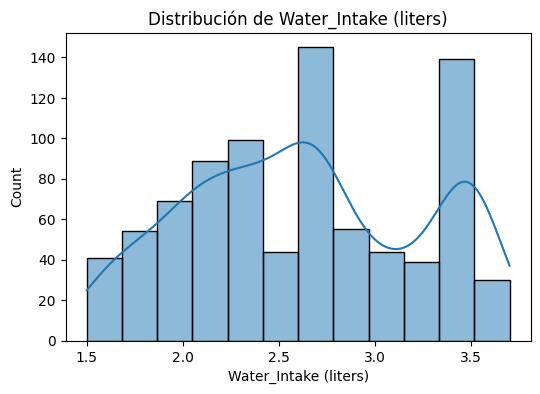

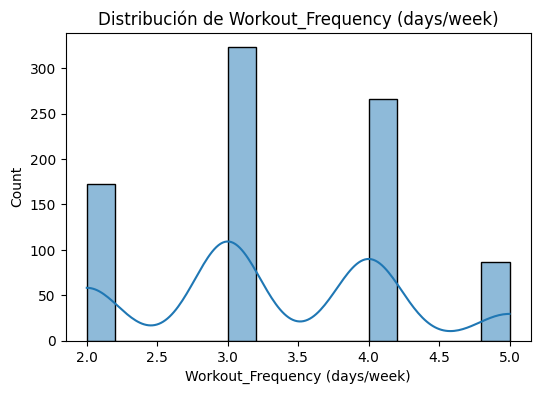

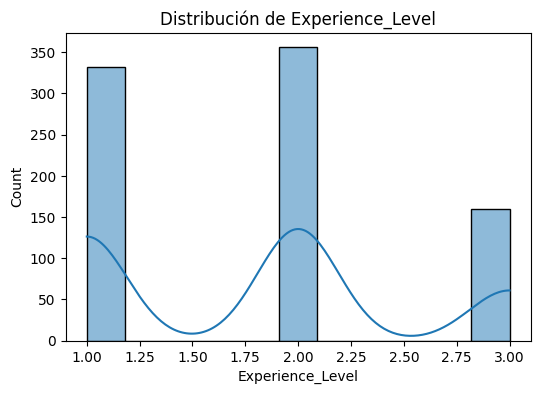

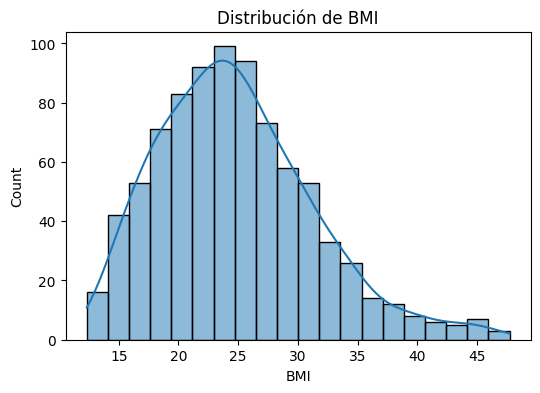

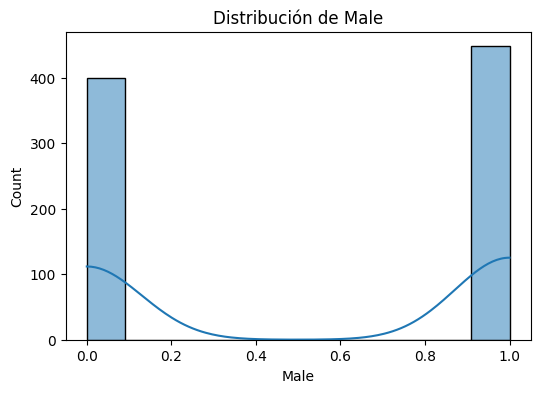

In [63]:
for col in df2.columns:
    plt.figure(figsize=(6, 4)) 
    sns.histplot(df2[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

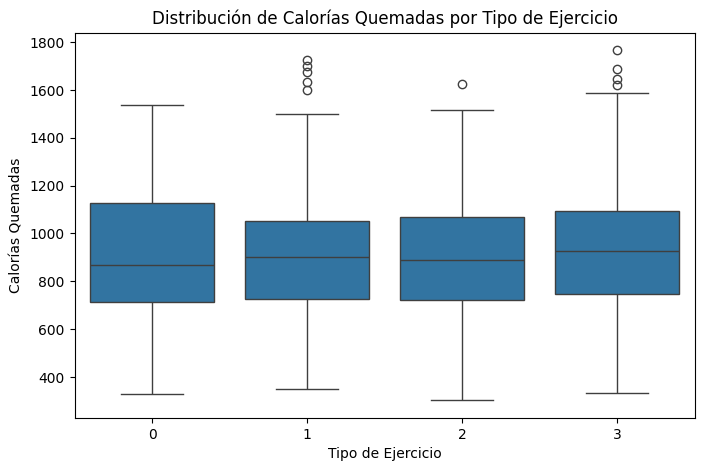

In [64]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x="Workout_Type", y="Calories_Burned")
plt.title("Distribución de Calorías Quemadas por Tipo de Ejercicio")
plt.xlabel("Tipo de Ejercicio")
plt.ylabel("Calorías Quemadas")
plt.show()
#'Yoga': 0, 'Strength': 1, 'Cardio': 2, 'HIIT': 3

<Axes: xlabel='Workout_Type', ylabel='Calories_Burned'>

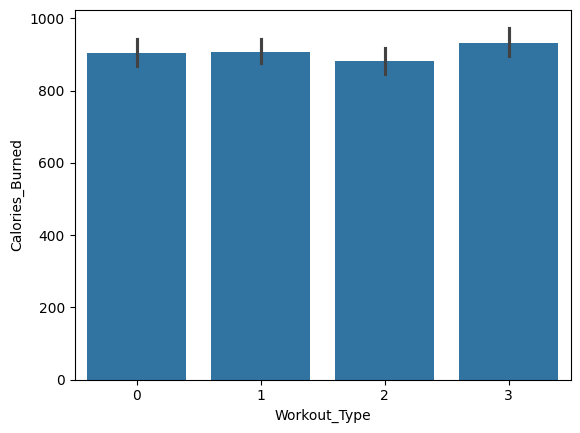

In [65]:
sns.barplot(x=df2["Workout_Type"],y=df2["Calories_Burned"])

In [66]:
out_l=df2[(df2["Calories_Burned"] > 800) & (df2["Calories_Burned"] < 1200)]


In [67]:
out_l["Experience_Level"].value_counts()

Experience_Level
2    246
1    125
3     68
Name: count, dtype: int64

In [68]:
out_l["Session_Duration (hours)"].value_counts()

Session_Duration (hours)
1.37    19
1.36    16
1.29    15
1.42    15
1.31    12
        ..
1.56     1
1.61     1
1.72     1
1.77     1
1.00     1
Name: count, Length: 86, dtype: int64

In [69]:
out_l2=df2[df2["Calories_Burned"]>1600]

In [70]:
out_l2["Experience_Level"].value_counts()

Experience_Level
3    9
Name: count, dtype: int64

In [71]:
out_l2["Session_Duration (hours)"].value_counts()

Session_Duration (hours)
1.97    2
1.93    1
1.82    1
1.96    1
1.87    1
1.88    1
1.90    1
2.00    1
Name: count, dtype: int64

Podemos suponer que esos outlier pueden deberse al nivel de la persona en cada ejercicio y a la duración. Cuanto mayor es el nivel y maás tiempo se dedique a la actividad física, más kcal se quemarán. Además vemos un salto en la duranción de las sesiones que pueden dar lugar a esos valores fuera de rango

<Axes: >

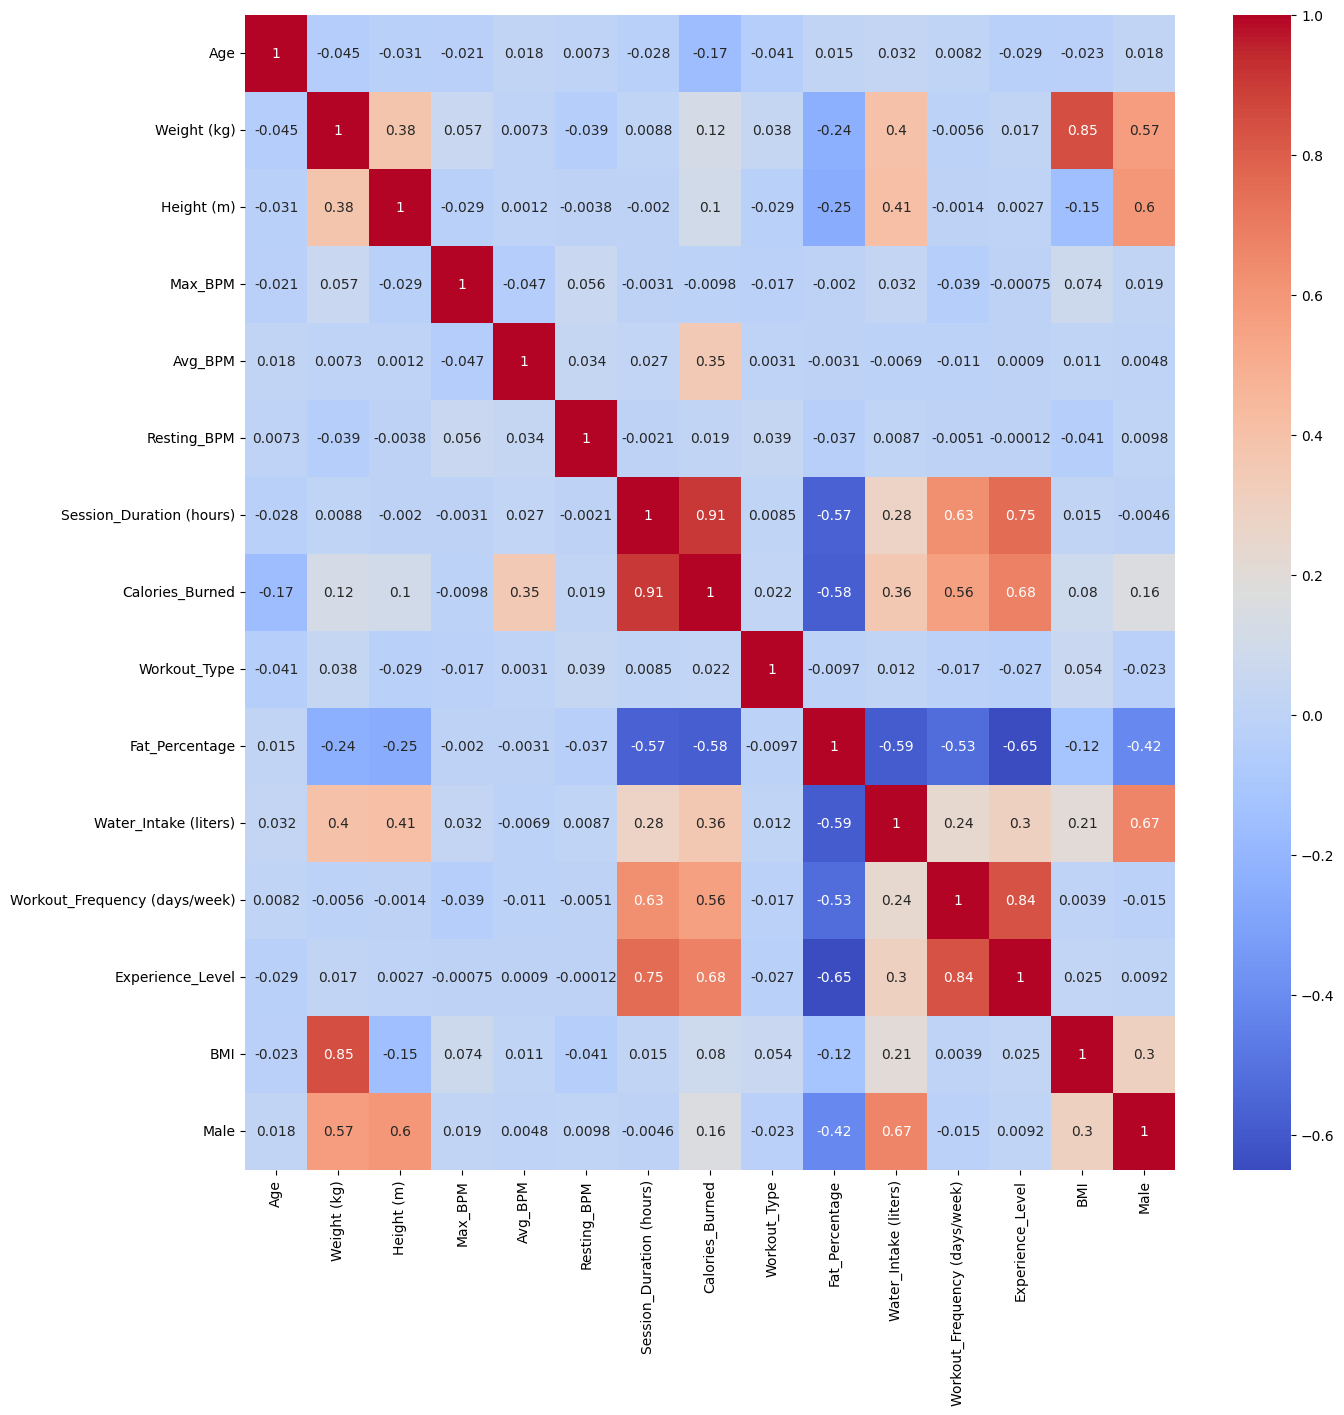

In [72]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True,cmap="coolwarm")

## **MODELOS**

El objetivo será conseguir un buen modelo con la menos cantidad de datos posibles, para así facilitar al usuario la experiencia en la app

### **MODELO NO SUPERVISADO**

In [73]:
X= df2.drop(columns="Calories_Burned")
y= df2["Calories_Burned"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(678, 14)
(170, 14)
(678,)
(170,)


In [76]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [77]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [78]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=10))

# Entrenar PCA en los datos escalados
X_train_pca = pca_pipeline.fit_transform(X_train)
X_test_pca = pca_pipeline.transform(X_test)

# Obtener el modelo PCA entrenado
modelo_pca = pca_pipeline.named_steps["pca"] 

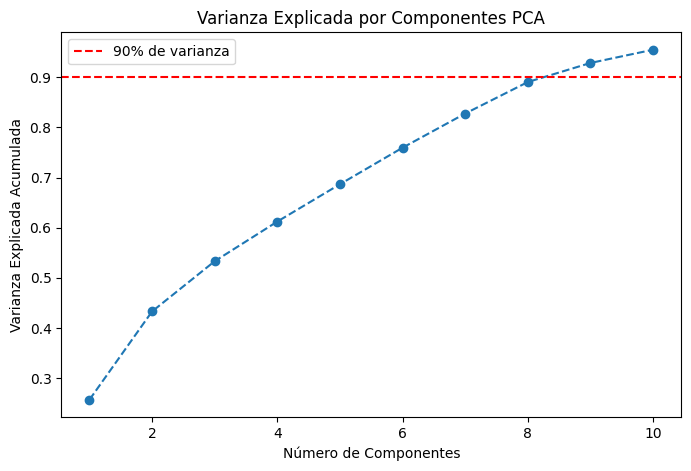

In [79]:

varianza_explicada = np.cumsum(modelo_pca.explained_variance_ratio_)

# Gráfico para ver cuántos componentes capturan al menos el 90% de la varianza
plt.figure(figsize=(8,5))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% de varianza")
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes PCA')
plt.legend()
plt.show()

----------------------

Guardamos el **modelo no supervisado**

In [80]:
import pickle

In [81]:
with open("../modelos/PCA.pkl", "wb") as archiv_model_pca:
    pickle.dump(modelo_pca, archiv_model_pca)

-------------------

### **MODELOS SUPERVISADOS**

Vamos a coger 10 variables que pueden ser interesantes para el modelo predictivo

In [82]:
X1= df2[['Age', 'Weight (kg)', 'Height (m)','Session_Duration (hours)','Fat_Percentage','Workout_Frequency (days/week)','Experience_Level','Workout_Type',"Male","BMI"]]
y1= df2["Calories_Burned"]

In [83]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [84]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(678, 10)
(170, 10)
(678,)
(170,)


In [85]:
scaler = StandardScaler()

X1_train_scal = scaler.fit_transform(X1_train)
X1_test_scal = scaler.transform(X1_test)

Entrenamos con varios modelo supervisados para ver cual nos da mejor resultado

como es de Regresión lineal y queremos ver los mismos datos en todos los modelos creamos una función

In [86]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 score", model.score(X_test, y_test))
    print("R2 score train", model.score(X_train, y_train))
    print("MAE", mean_absolute_error(y_test, y_pred))
    print("MSE", mean_squared_error(y_test, y_pred))
    print("RMSE", mean_squared_error(y_test, y_pred) ** (1/2))
    sns.displot(y_pred - y_test)
    return model

R2 score 0.9177676647064125
R2 score train 0.924686720230963
MAE 59.27588899108337
MSE 5652.966981122947
RMSE 75.18621536640175


LinearRegression()

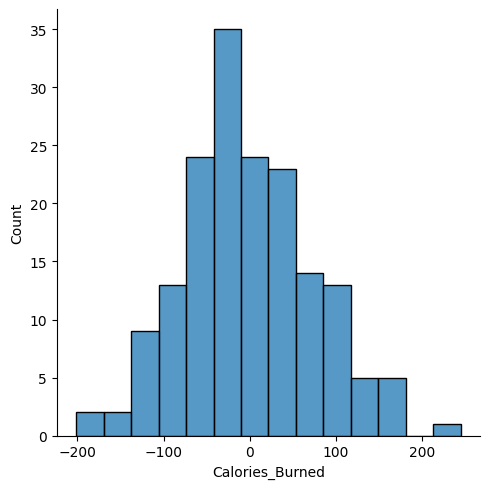

In [87]:
model_1 = train_evaluate_model(LinearRegression(), X_train_pca, y1_train, X_test_pca, y1_test)
model_1

Usando X de PCA es muy posible que tengamos overfitting entinces aunque los datos sean mejores en este modelo vamos a usar un X_train

R2 score 0.8877065591841189
R2 score train 0.8679620457590471
MAE 71.70479231670846
MSE 7719.482985160467
RMSE 87.86058834972862


LinearRegression()

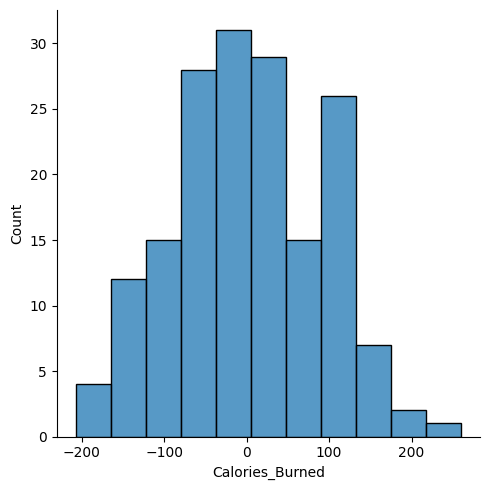

In [88]:
model_2 = train_evaluate_model(LinearRegression(), X1_train_scal, y1_train, X1_test_scal, y1_test)
model_2

R2 score 0.8877065591841188
R2 score train 0.8679620457590471
MAE 71.70479231670855
MSE 7719.482985160471
RMSE 87.86058834972863


LinearRegression()

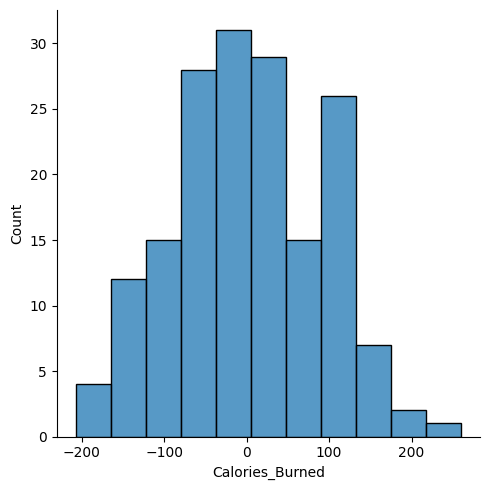

In [89]:
model_3 = train_evaluate_model(LinearRegression(), X1_train, y1_train, X1_test, y1_test)
model_3

Con modelos de regresión lineal no varía si usamos datos escalados o sin escalar

R2 score 0.8843828870527032
R2 score train 0.8664017733072211
MAE 73.43620562065651
MSE 7947.9649898109765
RMSE 89.15135999978338


Ridge(alpha=2)

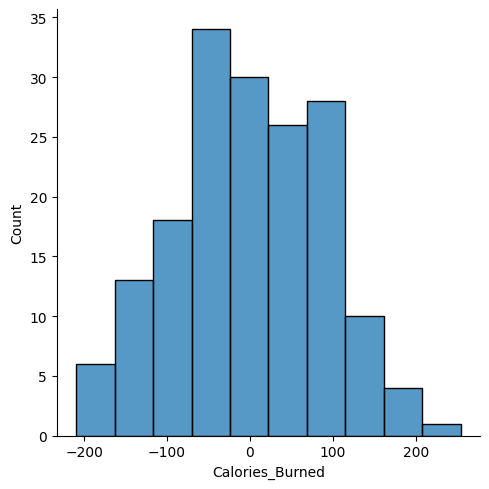

In [90]:
model_4 = train_evaluate_model(Ridge(alpha=2), X1_train, y1_train, X1_test, y1_test)
model_4

Obtenemos unos valores muy similares a los modelos anteriores, pero ligeramente peores

R2 score 0.893777873230189
R2 score train 0.8843050992155188
MAE 69.6604743507346
MSE 7302.117508284141
RMSE 85.45242833462453


LinearRegression()

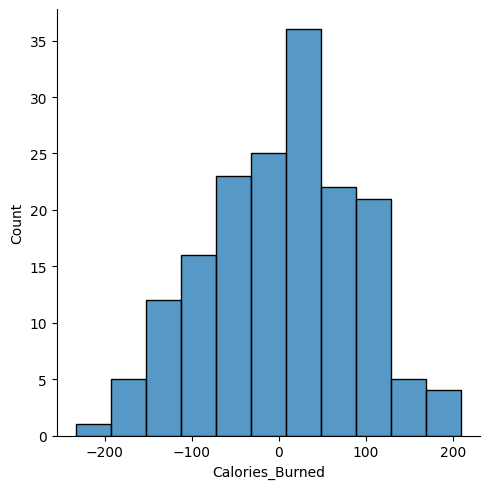

In [91]:
pol_2= PolynomialFeatures(degree=2)

X_train_pol2 = pol_2.fit_transform(X1_train)
X_test_pol2 = pol_2.transform(X1_test)

model_5 = train_evaluate_model(LinearRegression(), X_train_pol2, y1_train, X_test_pol2, y1_test)
model_5

Mejoran ligeramente los datos y tenemos una distribución más normalizada. Tenemos que tener en cuenta que el R" score roza el 90% (ha subiro un 1%) y puede darnos un poco más de overfitting

In [95]:
# Guardar el transformador PolynomialFeatures
with open("../modelos/pol2_transform_ejer.pkl", "wb") as pol_transf_ejer:
    pickle.dump(pol_2, pol_transf_ejer)

In [94]:
with open("../modelos/pol2_ejer.pkl", "wb") as model_pol2_ejer:
    pickle.dump(model_5, model_pol2_ejer)

R2 score 0.9689385572858984
R2 score train 0.8129079697154206
MAE 37.194660569523
MSE 2135.283029746944
RMSE 46.20912279785177


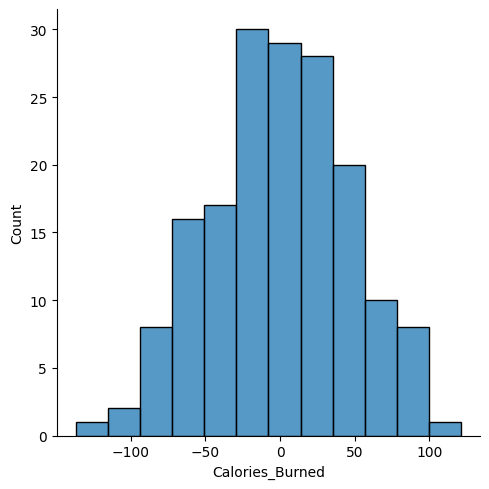

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rnd_reg = RandomForestRegressor(n_estimators=200,
                                 max_leaf_nodes=32,
                                 random_state=42)
rnd_reg.fit(X1_test, y1_test)

y_pred_reg = rnd_reg.predict(X1_test)
print("R2 score", rnd_reg.score(X1_test, y1_test))
print("R2 score train",rnd_reg.score(X1_train, y1_train))
print("MAE", mean_absolute_error(y1_test, y_pred_reg))
print("MSE", mean_squared_error(y1_test, y_pred_reg))
print("RMSE", mean_squared_error(y1_test, y_pred_reg) ** (1/2))
sns.displot(y_pred_reg - y1_test)

In [ ]:
with open("../modelos/rnd_ejer.pkl", "wb") as model_rnd_ejer:
    pickle.dump(rnd_reg, model_rnd_ejer)

Tenemenos una bajada en la dispersión (los valores más alejado se quedan entorno a 100 y no 200), se centran entorno a 0 auqnue tenemos algunas irregularidades. El R2 score es muy alto en train y ha bajao en test, esto puede ser un indicador de overfittin, aunque todos los errores han bajado mucho

-------------------------

Evaluamos con el datset de test

In [ ]:
df_kcal=pd.read_csv("../data/data_test.csv")

In [ ]:
df_kcal.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   28  Female         55.1        1.79      192      159           67   
1   47    Male        127.1        1.76      199      157           73   
2   48  Female         69.1        1.60      191      166           53   
3   41  Female         66.8        1.74      164      149           57   
4   26    Male        125.5        1.76      176      163           66   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.99           1582.0         Yoga            17.0   
1                      0.71            552.0     Strength            24.9   
2                      1.34           1001.0     Strength            26.1   
3                      1.34            898.0         Yoga            29.2   
4                      1.15           1031.0         Yoga            23.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    2.7                              5                 3   
1                    3.0                              2                 1   
2                    2.0                              4                 2   
3                    2.3                              3                 1   
4                    3.1                              4                 2   

     BMI  
0  17.20  
1  41.03  
2  26.99  
3  22.06  
4  40.52

Hacemos las mismas transformaciones que en train

In [ ]:
df_kcal["Male"] = df_kcal["Gender"].map({"Male": 1, "Female": 0})
df_kcal=df_kcal.drop(columns="Gender")

mapping = {'Yoga': 0, 'Strength': 1, 'Cardio': 2, 'HIIT': 3}
df_kcal['Workout_Type'] = df_kcal['Workout_Type'].map(mapping)

X_kcl= df_kcal[['Age', 'Weight (kg)', 'Height (m)','Session_Duration (hours)','Fat_Percentage','Workout_Frequency (days/week)','Experience_Level','Workout_Type',"Male","BMI"]]


Hacemos predicciones con el modelos de pol_2 y con el rnd

In [ ]:
X_kcl_pol2 = pol_2.transform(X_kcl)
y_pred_kcal_pol2 = model_5.predict(X_kcl_pol2)

In [ ]:
y_pred_kcal_pol2=np.round(y_pred_kcal_pol2)

In [ ]:
prediccion_pol2=pd.DataFrame({"Age":df_kcal["Age"],"kcal":y_pred_kcal_pol2,"Kcal_real":df_kcal["Calories_Burned"]})

In [ ]:
prediccion_pol2.head(10)

Age     kcal  Kcal_real
0   28  1444.57     1582.0
1   47   558.41      552.0
2   48   897.31     1001.0
3   41   902.82      898.0
4   26   958.65     1031.0
5   20   745.29      893.0
6   48   762.24      876.0
7   57   751.04      795.0
8   54   446.86      454.0
9   53  1106.80     1107.0

In [ ]:
y_pred_kcal_rnd = np.round(rnd_reg.predict(X_kcl))
prediccion_rnd=pd.DataFrame({"Age":df_kcal["Age"],"kcal":y_pred_kcal_rnd,"Kcal_real":df_kcal["Calories_Burned"]})
prediccion_rnd.head(10)

Age     kcal  Kcal_real
0   28  1202.22     1582.0
1   47   482.79      552.0
2   48   949.49     1001.0
3   41   948.38      898.0
4   26   883.31     1031.0
5   20   789.23      893.0
6   48   823.08      876.0
7   57   839.07      795.0
8   54   458.93      454.0
9   53  1121.54     1107.0

In [ ]:
df_comprobar_pol2=pd.DataFrame({"y_pred":prediccion_pol2["kcal"],"y_real": df_kcal["Calories_Burned"]})

**Evaluamos que modelo de los escogidos nos da mejores resultados en test**

In [ ]:
from sklearn.metrics import r2_score
mae = mean_absolute_error(df_comprobar_pol2["y_real"], df_comprobar_pol2["y_pred"])
mse = mean_squared_error(df_comprobar_pol2["y_real"], df_comprobar_pol2["y_pred"])
rmse = np.sqrt(mse)
r2 = r2_score(df_comprobar_pol2["y_real"],df_comprobar_pol2["y_pred"])

# Mostrar resultados
print(f"MAE: {mae:.2f} kcal")
print(f"RMSE: {rmse:.2f} kcal")
print(f"R² Score: {r2:.2f}")#(Cuanto más cerca de 1, mejor)

MAE: 86.36 kcal
RMSE: 106.54 kcal
R² Score: 0.86


In [ ]:
df_comprobar_rnd=pd.DataFrame({"y_pred":prediccion_rnd["kcal"],"y_real": df_kcal["Calories_Burned"]})

In [ ]:
mae = mean_absolute_error(df_comprobar_rnd["y_real"], df_comprobar_rnd["y_pred"])
mse = mean_squared_error(df_comprobar_rnd["y_real"], df_comprobar_rnd["y_pred"])
rmse = np.sqrt(mse)
r2 = r2_score(df_comprobar_rnd["y_real"],df_comprobar_rnd["y_pred"])

# Mostrar resultados
print(f"MAE: {mae:.2f} kcal")
print(f"RMSE: {rmse:.2f} kcal")
print(f"R² Score: {r2:.2f}")#(Cuanto más cerca de 1, mejor)

MAE: 85.38 kcal
RMSE: 116.06 kcal
R² Score: 0.83


El modelo polinomico nos da datos ligeramente mejores resultados en cuanto al error, por lo que nos quedaremos con el polinomico para hacer las predicciones

--------------------------

-----------------------------